In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
pd.set_option('display.max_columns', None)

In [2]:
#Read the dataset
shopping = pd.read_excel('C:/Users/admin/Desktop/CE-Projects/ProjeHDVB/6.NewData.xlsx')

In [3]:
#Get the number of rows and columns
shopping.shape

(315, 93)

In [4]:
#First 5 record
shopping.head()

,Country,City,U_RSS_1,U_RSS_2,U_RSS_3,U_RSS_4,U_RSS_T,E_RSS_1,E_RSS_2,E_RSS_3,E_RSS_T,Info_RSS_1,Info_RSS_2,Info_RSS_3,Info_RSS_T,Irr_RSS_1,Irr_RSS_2,Irr_RSS_3,Irr_RSS_T,PI_RSS_1,PI_RSS_2,PI_RSS_3,PI_RSS_4,PI_RSS_T,U_ARSS_1,U_ARSS_2,U_ARSS_3,U_ARSS_4,U_ARSS_T,E_ARSS_1,E_ARSS_2,E_ARSS_3,E_ARSS_T,Info_ARSS_1,Info_ARSS_2,Info_ARSS_3,Info_ARSS_T,Irr_ARSS_1,Irr_ARSS_2,Irr_ARSS_3,Irr_ARSS_T,PI_ARSS_1,PI_ARSS_2,PI_ARSS_3,PI_ARSS_4,PI_ARSS_T,Tr_ARSS_1,Tr_ARSS_2,Tr_ARSS_3,Tr_ARSS_4,Tr_ARSS_5,Tr_ARSS_6,Tr_ARSS_T,U_EARSS_1,U_EARSS_2,U_EARSS_3,U_EARSS_4,U_EARSS_T,E_EARSS_1,E_EARSS_2,E_EARSS_3,E_EARSS_T,Info_EARSS_1,Info_EARSS_2,Info_EARSS_3,Info_EARSS_T,Irr_EARSS_1,Irr_EARSS_2,Irr_EARSS_3,Irr_EARSS_T,PI_EARSS_1,PI_EARSS_2,PI_EARSS_3,PI_EARSS_4,PI_EARSS_T,Tr_EARSS_1,Tr_EARSS_2,Tr_EARSS_3,Tr_EARSS_4,Tr_EARSS_5,Tr_EARSS_6,Tr_EARSS_T,Age,Gender,Income,ShoppingFrequency,Education,ResideCountry,SurveySatisfaction,RSS_Mean,ARSS_Mean,EARSS_Mean,MeanOfThreeTypes
0,Germany,Cuxhaven,3,3,4,3,3.25,1,1,3,1.666667,3,3,3,3.000000,1,1,1,1.000000,3,4,4,4,3.75,1,1,1,1,1.00,1,1,1,1.000000,1,2,2,1.666667,5,5,5,5.000000,1,1,1,1,1.00,1,1,1,5,3,1,2.000000,1,1,1,1,1.0,1,1,1,1.0,1,2,2,1.666667,5,5,5,5.000000,1,1,1,1,1.00,1,1,1,5,3,1,2.000000,50,Male,1000€-1500€,Not at all frequently,Completed secondary education (graduated high ...,Germany,NaN,2.53,1.94,1.94,2.14
1,Germany,Hettstedt,5,5,5,5,5.00,5,5,5,5.000000,5,5,5,5.000000,5,1,1,2.333333,5,4,4,4,4.25,5,4,5,5,4.75,5,5,5,5.000000,5,5,5,5.000000,5,1,1,2.333333,5,4,4,4,4.25,4,4,5,5,4,5,4.500000,5,5,5,5,5.0,5,5,5,5.0,5,5,5,5.000000,5,1,1,2.333333,4,4,4,5,4.25,5,5,5,5,4,5,4.833333,57,Female,1500€-2000€,Moderately frequently,Some secondary education (high school),Germany,NaN,4.32,4.31,4.40,4.34
2,Germany,Oldenburg,3,3,3,4,3.25,4,4,3,3.666667,3,3,4,3.333333,2,2,2,2.000000,4,4,4,5,4.25,3,4,4,4,3.75,2,3,2,2.333333,4,4,4,4.000000,4,2,3,3.000000,2,2,2,2,2.00,4,3,3,4,4,2,3.333333,4,4,4,4,4.0,3,3,3,3.0,5,4,2,3.666667,3,3,3,3.000000,3,2,3,2,2.50,3,3,2,4,4,4,3.333333,23,Male,<1000€,Moderately frequently,Completed secondary education (graduated high ...,Germany,NaN,3.30,3.07,3.25,3.21
3,Germany,Giessen,2,1,3,3,2.25,1,1,1,1.000000,2,2,2,2.000000,3,5,1,3.000000,3,3,3,3,3.00,1,3,1,1,1.50,1,1,1,1.000000,1,1,1,1.000000,5,5,5,5.000000,1,1,1,1,1.00,1,3,3,5,1,1,2.333333,1,1,1,1,1.0,1,1,1,1.0,1,1,1,1.000000,5,5,5,5.000000,1,1,1,1,1.00,1,1,1,5,1,1,1.666667,34,Female,3000€-3500€,Moderately frequently,Some undergraduate education (college or unive...,Germany,NaN,2.25,1.97,1.78,2.00
4,Germany,Langenhagen,3,3,3,3,3.00,3,3,3,3.000000,3,3,3,3.000000,1,1,1,1.000000,3,4,4,4,3.75,3,3,3,4,3.25,4,4,4,4.000000,4,3,3,3.333333,1,1,2,1.333333,3,4,3,4,3.50,3,3,3,3,3,3,3.000000,3,3,3,3,3.0,2,2,2,2.0,3,3,3,3.000000,4,3,4,3.666667,3,3,2,3,2.75,3,3,3,3,3,2,2.833333,43,Female,1500€-2000€,Not at all frequently,Completed secondary education (graduated high ...,Germany,NaN,2.75,3.07,2.88,2.90


In [5]:
#Get statistical info on numerical coulumns in the dataset
shopping.describe()

,U_RSS_1,U_RSS_2,U_RSS_3,U_RSS_4,U_RSS_T,E_RSS_1,E_RSS_2,E_RSS_3,E_RSS_T,Info_RSS_1,Info_RSS_2,Info_RSS_3,Info_RSS_T,Irr_RSS_1,Irr_RSS_2,Irr_RSS_3,Irr_RSS_T,PI_RSS_1,PI_RSS_2,PI_RSS_3,PI_RSS_4,PI_RSS_T,U_ARSS_1,U_ARSS_2,U_ARSS_3,U_ARSS_4,U_ARSS_T,E_ARSS_1,E_ARSS_2,E_ARSS_3,E_ARSS_T,Info_ARSS_1,Info_ARSS_2,Info_ARSS_3,Info_ARSS_T,Irr_ARSS_1,Irr_ARSS_2,Irr_ARSS_3,Irr_ARSS_T,PI_ARSS_1,PI_ARSS_2,PI_ARSS_3,PI_ARSS_4,PI_ARSS_T,Tr_ARSS_1,Tr_ARSS_2,Tr_ARSS_3,Tr_ARSS_4,Tr_ARSS_5,Tr_ARSS_6,Tr_ARSS_T,U_EARSS_1,U_EARSS_2,U_EARSS_3,U_EARSS_4,U_EARSS_T,E_EARSS_1,E_EARSS_2,E_EARSS_3,E_EARSS_T,Info_EARSS_1,Info_EARSS_2,Info_EARSS_3,Info_EARSS_T,Irr_EARSS_1,Irr_EARSS_2,Irr_EARSS_3,Irr_EARSS_T,PI_EARSS_1,PI_EARSS_2,PI_EARSS_3,PI_EARSS_4,PI_EARSS_T,Tr_EARSS_1,Tr_EARSS_2,Tr_EARSS_3,Tr_EARSS_4,Tr_EARSS_5,Tr_EARSS_6,Tr_EARSS_T,Age,SurveySatisfaction,RSS_Mean,ARSS_Mean,EARSS_Mean,MeanOfThreeTypes
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,303.000000,315.000000,315.000000,315.000000,315.000000
mean,2.800000,2.844444,2.892063,3.104762,2.910317,2.892063,3.034921,2.634921,2.853905,2.866667,3.098413,2.936508,2.967238,2.428571,2.295238,2.234921,2.319460,3.092063,3.171429,3.168254,3.155556,3.146825,3.212698,3.177778,3.193651,3.336508,3.230159,3.142857,3.111111,3.095238,3.116402,3.330159,3.400000,3.326984,3.352476,2.574603,2.466667,2.625397,2.555513,3.031746,3.111111,3.050794,3.117460,3.077778,3.180952,3.047619,3.139683,3.266667,2.819048,3.025397,3.079831,3.346032,3.273016,3.314286,3.431746,3.341270,3.171429,3.155556,3.187302,3.171386,3.542857,3.647619,3.657143,3.615873,2.600000,2.336508,2.561905,2.499429,3.034921,3.142857,3.161905,3.149206,3.122222,3.219048,3.114286,3.193651,3.206349,2.987302,3.171429,3.148709,37.085714,3.557756,2.839587,3.068635,3.149810,3.019302
std,0.910659,0.936482,0.910537,0.880690,0.771515,0.931286,0.834403,1.017390,0.803328,0.984595,0.996729,0.981890,0.877554,1.033119,1.018214,1.023009,0.848129,0.990930,0.911258,0.954511,0.939877,0.832791,1.032512,0.970987,1.027004,1.010030,0.909633,0.991318,0.946181,1.036197,0.884629,0.996272,0.980056,0.995724,0.892996,1.130071,1.129229,1.139612,0.997347,0.989889,0.979261,1.008226,0.985005,0.888881,0.938704,0.924345,0.964091,0.989756,1.059813,1.076378,0.643197,1.063707,1.100840,1.088278,1.066697,0.969993,1.047811,0.973172,1.064705,0.924583,0.967911,0.927097,0.918617,0.835207,1.164222,1.088928,1.212387,1.020893,1.056698,1.068619,1.065891,1.018909,0.948170,0.923655,0.977267,0.969581,1.058161,1.091293,1.154806,0.676242,11.423616,0.854941,0.521234,0.533259,0.553464,0.428980
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.170000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00

In [6]:
#Get detailed info on the dataset
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 93 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             315 non-null    object 
 1   City                315 non-null    object 
 2   U_RSS_1             315 non-null    int64  
 3   U_RSS_2             315 non-null    int64  
 4   U_RSS_3             315 non-null    int64  
 5   U_RSS_4             315 non-null    int64  
 6   U_RSS_T             315 non-null    float64
 7   E_RSS_1             315 non-null    int64  
 8   E_RSS_2             315 non-null    int64  
 9   E_RSS_3             315 non-null    int64  
 10  E_RSS_T             315 non-null    float64
 11  Info_RSS_1          315 non-null    int64  
 12  Info_RSS_2          315 non-null    int64  
 13  Info_RSS_3          315 non-null    int64  
 14  Info_RSS_T          315 non-null    float64
 15  Irr_RSS_1           315 non-null    int64  
 16  Irr_RSS_

In [7]:
#Check for missing values in the dataset
null_columns=shopping.columns[shopping.isnull().any()]
shopping.isnull().sum()

Country                0
City                   0
U_RSS_1                0
U_RSS_2                0
U_RSS_3                0
                      ..
SurveySatisfaction    12
RSS_Mean               0
ARSS_Mean              0
EARSS_Mean             0
MeanOfThreeTypes       0
Length: 93, dtype: int64

In [8]:
#Fill the missing values in the 'SurveySatisfaction' column with the median of the column
shopping['SurveySatisfaction'].fillna(value = shopping['SurveySatisfaction'].median(), inplace=True)

In [9]:
#Get unique values in [Education] column
print(shopping['Education'].unique())

['Completed secondary education (graduated high school)'
 'Some secondary education (high school)'
 'Some undergraduate education (college or university)'
 'Completed postgraduate education (masters or doctorate)']


In [10]:
#Replace 'Some secondary education (high school)' with 'Completed secondary education (graduated high school)' as they mean the same thing
shopping['Education'] = shopping['Education'].replace('Some secondary education (high school)','Completed secondary education (graduated high school)')

In [11]:
#Unique Values after replacement
print(shopping['Education'].unique())

['Completed secondary education (graduated high school)'
 'Some undergraduate education (college or university)'
 'Completed postgraduate education (masters or doctorate)']


In [12]:
#Put unique cell values of Columns
#COUNTRY
strCountry = shopping['Country'].unique()
#CITY
strCity = shopping['City'].unique()
#GENDER
strGender = shopping['Gender'].unique()
#INCOME
strIncome = shopping['Income'].unique()
#SHOPPINGFREQUENCY
strShoppingFrequency = shopping['ShoppingFrequency'].unique()
#EDUCATION
strEducation = shopping['Education'].unique()
#RESIDECOUNTRY
strResideCountry = shopping['ResideCountry'].unique()

In [13]:
#Turn Categoric Values into Numeric Values
#COUNTRY
shopping['Country'] = shopping['Country'].astype('category')
shopping['Country'] = shopping['Country'].cat.codes
#CITY
shopping['City'] = shopping['City'].astype('category')
shopping['City'] = shopping['City'].cat.codes
#GENDER
shopping['Gender'] = shopping['Gender'].astype('category')
shopping['Gender'] = shopping['Gender'].cat.codes
#INCOME
shopping['Income'] = shopping['Income'].astype('category')
shopping['Income'] = shopping['Income'].cat.codes
#SHOPPINGFREQUENCY
shopping['ShoppingFrequency'] = shopping['ShoppingFrequency'].astype('category')
shopping['ShoppingFrequency'] = shopping['ShoppingFrequency'].cat.codes
#EDUCATION
shopping['Education'] = shopping['Education'].astype('category')
shopping['Education'] = shopping['Education'].cat.codes
#RESIDECOUNTRY
shopping['ResideCountry'] = shopping['ResideCountry'].astype('category')
shopping['ResideCountry'] = shopping['ResideCountry'].cat.codes

shopping.head()

,Country,City,U_RSS_1,U_RSS_2,U_RSS_3,U_RSS_4,U_RSS_T,E_RSS_1,E_RSS_2,E_RSS_3,E_RSS_T,Info_RSS_1,Info_RSS_2,Info_RSS_3,Info_RSS_T,Irr_RSS_1,Irr_RSS_2,Irr_RSS_3,Irr_RSS_T,PI_RSS_1,PI_RSS_2,PI_RSS_3,PI_RSS_4,PI_RSS_T,U_ARSS_1,U_ARSS_2,U_ARSS_3,U_ARSS_4,U_ARSS_T,E_ARSS_1,E_ARSS_2,E_ARSS_3,E_ARSS_T,Info_ARSS_1,Info_ARSS_2,Info_ARSS_3,Info_ARSS_T,Irr_ARSS_1,Irr_ARSS_2,Irr_ARSS_3,Irr_ARSS_T,PI_ARSS_1,PI_ARSS_2,PI_ARSS_3,PI_ARSS_4,PI_ARSS_T,Tr_ARSS_1,Tr_ARSS_2,Tr_ARSS_3,Tr_ARSS_4,Tr_ARSS_5,Tr_ARSS_6,Tr_ARSS_T,U_EARSS_1,U_EARSS_2,U_EARSS_3,U_EARSS_4,U_EARSS_T,E_EARSS_1,E_EARSS_2,E_EARSS_3,E_EARSS_T,Info_EARSS_1,Info_EARSS_2,Info_EARSS_3,Info_EARSS_T,Irr_EARSS_1,Irr_EARSS_2,Irr_EARSS_3,Irr_EARSS_T,PI_EARSS_1,PI_EARSS_2,PI_EARSS_3,PI_EARSS_4,PI_EARSS_T,Tr_EARSS_1,Tr_EARSS_2,Tr_EARSS_3,Tr_EARSS_4,Tr_EARSS_5,Tr_EARSS_6,Tr_EARSS_T,Age,Gender,Income,ShoppingFrequency,Education,ResideCountry,SurveySatisfaction,RSS_Mean,ARSS_Mean,EARSS_Mean,MeanOfThreeTypes
0,1,34,3,3,4,3,3.25,1,1,3,1.666667,3,3,3,3.000000,1,1,1,1.000000,3,4,4,4,3.75,1,1,1,1,1.00,1,1,1,1.000000,1,2,2,1.666667,5,5,5,5.000000,1,1,1,1,1.00,1,1,1,5,3,1,2.000000,1,1,1,1,1.0,1,1,1,1.0,1,2,2,1.666667,5,5,5,5.000000,1,1,1,1,1.00,1,1,1,5,3,1,2.000000,50,2,0,2,1,1,4.0,2.53,1.94,1.94,2.14
1,1,87,5,5,5,5,5.00,5,5,5,5.000000,5,5,5,5.000000,5,1,1,2.333333,5,4,4,4,4.25,5,4,5,5,4.75,5,5,5,5.000000,5,5,5,5.000000,5,1,1,2.333333,5,4,4,4,4.25,4,4,5,5,4,5,4.500000,5,5,5,5,5.0,5,5,5,5.0,5,5,5,5.000000,5,1,1,2.333333,4,4,4,5,4.25,5,5,5,5,4,5,4.833333,57,1,1,1,1,1,4.0,4.32,4.31,4.40,4.34
2,1,138,3,3,3,4,3.25,4,4,3,3.666667,3,3,4,3.333333,2,2,2,2.000000,4,4,4,5,4.25,3,4,4,4,3.75,2,3,2,2.333333,4,4,4,4.000000,4,2,3,3.000000,2,2,2,2,2.00,4,3,3,4,4,2,3.333333,4,4,4,4,4.0,3,3,3,3.0,5,4,2,3.666667,3,3,3,3.000000,3,2,3,2,2.50,3,3,2,4,4,4,3.333333,23,2,8,1,1,1,4.0,3.30,3.07,3.25,3.21
3,1,66,2,1,3,3,2.25,1,1,1,1.000000,2,2,2,2.000000,3,5,1,3.000000,3,3,3,3,3.00,1,3,1,1,1.50,1,1,1,1.000000,1,1,1,1.000000,5,5,5,5.000000,1,1,1,1,1.00,1,3,3,5,1,1,2.333333,1,1,1,1,1.0,1,1,1,1.0,1,1,1,1.000000,5,5,5,5.000000,1,1,1,1,1.00,1,1,1,5,1,1,1.666667,34,1,4,1,2,1,4.0,2.25,1.97,1.78,2.00
4,1,110,3,3,3,3,3.00,3,3,3,3.000000,3,3,3,3.000000,1,1,1,1.000000,3,4,4,4,3.75,3,3,3,4,3.25,4,4,4,4.000000,4,3,3,3.333333,1,1,2,1.333333,3,4,3,4,3.50,3,3,3,3,3,3,3.000000,3,3,3,3,3.0,2,2,2,2.0,3,3,3,3.000000,4,3,4,3.666667,3,3,2,3,2.75,3,3,3,3,3,2,2.833333,43,1,1,2,1,1,4.0,2.75,3.07,2.88,2.90


In [14]:
#Match old string values with their numeric equvalients
#COUNTRY
country = {shopping['Country'].unique()[i]: strCountry[i] for i in range(len(strCountry)-1)}
#CITY
city = {shopping['City'].unique()[i]: strCity[i] for i in range(len(strCity)-1)}
#GENDER
gender = {shopping['Gender'].unique()[i]: strGender[i] for i in range(len(strGender)-1)}
#INCOME
income = {shopping['Income'].unique()[i]: strIncome[i] for i in range(len(strIncome)-1)}
#SHOPPINGFREQUENCY
shoppingFrequency = {shopping['ShoppingFrequency'].unique()[i]: strShoppingFrequency[i] for i in range(len(strShoppingFrequency)-1)}
#EDUCATION
education = {shopping['Education'].unique()[i]: strEducation[i] for i in range(len(strEducation)-1)}
#RESIDECOUNTRY
resideCountry = {shopping['ResideCountry'].unique()[i]: strResideCountry[i] for i in range(len(strResideCountry)-1)}

In [15]:
#Print Categoric equivalents of converted Numeric values
print(country)
print(city)
print(gender)
print(income)
print(shoppingFrequency)
print(education )
print(resideCountry)

{1: 'Germany', 0: 'Austria', 2: 'Switzerland'}
{34: 'Cuxhaven', 87: 'Hettstedt', 138: 'Oldenburg', 66: 'Giessen', 110: 'Langenhagen', 146: 'Postbauer-heng', 118: 'Linz', 53: 'Erkner', 188: 'Zurich', 130: 'Munich', 176: 'Vienna', 131: 'Munster', 98: 'Kassel', 65: 'Gerbrunn', 17: 'Berlin', 145: 'Poing', 14: 'Bamberg', 182: 'Wetzlar', 64: 'Gera', 19: 'Bochum', 120: 'Lohne', 44: 'Dresden', 22: 'Bonn', 169: 'Thaleischweiler-froschen', 85: 'Heidelberg', 7: 'Augsburg', 186: 'Wimmelburg', 151: 'Rosenheim', 2: 'Aicha Vorm Wald', 160: 'Schelklingen', 102: 'Klettgau', 32: 'Cloppenburg', 57: 'Essen', 139: 'Oldenburg In Holstein', 80: 'Hartenstein', 29: 'Burg', 101: 'Kirchheim', 47: 'Eich', 81: 'Hassfurt', 78: 'Hamburg', 95: 'Innsbruck', 104: 'Koln', 94: 'Hovelhof', 73: 'Grimma', 20: 'Bodelshausen', 59: 'Filderstadt', 52: 'Emskirchen', 55: 'Erlangen', 16: 'Benediktbeuern', 114: 'Leipzig', 132: 'Neuss', 75: 'Gundelfingen', 60: 'Frankfurt Am Main', 26: 'Braunschweig', 135: 'Nurnberg', 38: 'Detmold', 

In [16]:
#Check the dataset
shopping.head()

,Country,City,U_RSS_1,U_RSS_2,U_RSS_3,U_RSS_4,U_RSS_T,E_RSS_1,E_RSS_2,E_RSS_3,E_RSS_T,Info_RSS_1,Info_RSS_2,Info_RSS_3,Info_RSS_T,Irr_RSS_1,Irr_RSS_2,Irr_RSS_3,Irr_RSS_T,PI_RSS_1,PI_RSS_2,PI_RSS_3,PI_RSS_4,PI_RSS_T,U_ARSS_1,U_ARSS_2,U_ARSS_3,U_ARSS_4,U_ARSS_T,E_ARSS_1,E_ARSS_2,E_ARSS_3,E_ARSS_T,Info_ARSS_1,Info_ARSS_2,Info_ARSS_3,Info_ARSS_T,Irr_ARSS_1,Irr_ARSS_2,Irr_ARSS_3,Irr_ARSS_T,PI_ARSS_1,PI_ARSS_2,PI_ARSS_3,PI_ARSS_4,PI_ARSS_T,Tr_ARSS_1,Tr_ARSS_2,Tr_ARSS_3,Tr_ARSS_4,Tr_ARSS_5,Tr_ARSS_6,Tr_ARSS_T,U_EARSS_1,U_EARSS_2,U_EARSS_3,U_EARSS_4,U_EARSS_T,E_EARSS_1,E_EARSS_2,E_EARSS_3,E_EARSS_T,Info_EARSS_1,Info_EARSS_2,Info_EARSS_3,Info_EARSS_T,Irr_EARSS_1,Irr_EARSS_2,Irr_EARSS_3,Irr_EARSS_T,PI_EARSS_1,PI_EARSS_2,PI_EARSS_3,PI_EARSS_4,PI_EARSS_T,Tr_EARSS_1,Tr_EARSS_2,Tr_EARSS_3,Tr_EARSS_4,Tr_EARSS_5,Tr_EARSS_6,Tr_EARSS_T,Age,Gender,Income,ShoppingFrequency,Education,ResideCountry,SurveySatisfaction,RSS_Mean,ARSS_Mean,EARSS_Mean,MeanOfThreeTypes
0,1,34,3,3,4,3,3.25,1,1,3,1.666667,3,3,3,3.000000,1,1,1,1.000000,3,4,4,4,3.75,1,1,1,1,1.00,1,1,1,1.000000,1,2,2,1.666667,5,5,5,5.000000,1,1,1,1,1.00,1,1,1,5,3,1,2.000000,1,1,1,1,1.0,1,1,1,1.0,1,2,2,1.666667,5,5,5,5.000000,1,1,1,1,1.00,1,1,1,5,3,1,2.000000,50,2,0,2,1,1,4.0,2.53,1.94,1.94,2.14
1,1,87,5,5,5,5,5.00,5,5,5,5.000000,5,5,5,5.000000,5,1,1,2.333333,5,4,4,4,4.25,5,4,5,5,4.75,5,5,5,5.000000,5,5,5,5.000000,5,1,1,2.333333,5,4,4,4,4.25,4,4,5,5,4,5,4.500000,5,5,5,5,5.0,5,5,5,5.0,5,5,5,5.000000,5,1,1,2.333333,4,4,4,5,4.25,5,5,5,5,4,5,4.833333,57,1,1,1,1,1,4.0,4.32,4.31,4.40,4.34
2,1,138,3,3,3,4,3.25,4,4,3,3.666667,3,3,4,3.333333,2,2,2,2.000000,4,4,4,5,4.25,3,4,4,4,3.75,2,3,2,2.333333,4,4,4,4.000000,4,2,3,3.000000,2,2,2,2,2.00,4,3,3,4,4,2,3.333333,4,4,4,4,4.0,3,3,3,3.0,5,4,2,3.666667,3,3,3,3.000000,3,2,3,2,2.50,3,3,2,4,4,4,3.333333,23,2,8,1,1,1,4.0,3.30,3.07,3.25,3.21
3,1,66,2,1,3,3,2.25,1,1,1,1.000000,2,2,2,2.000000,3,5,1,3.000000,3,3,3,3,3.00,1,3,1,1,1.50,1,1,1,1.000000,1,1,1,1.000000,5,5,5,5.000000,1,1,1,1,1.00,1,3,3,5,1,1,2.333333,1,1,1,1,1.0,1,1,1,1.0,1,1,1,1.000000,5,5,5,5.000000,1,1,1,1,1.00,1,1,1,5,1,1,1.666667,34,1,4,1,2,1,4.0,2.25,1.97,1.78,2.00
4,1,110,3,3,3,3,3.00,3,3,3,3.000000,3,3,3,3.000000,1,1,1,1.000000,3,4,4,4,3.75,3,3,3,4,3.25,4,4,4,4.000000,4,3,3,3.333333,1,1,2,1.333333,3,4,3,4,3.50,3,3,3,3,3,3,3.000000,3,3,3,3,3.0,2,2,2,2.0,3,3,3,3.000000,4,3,4,3.666667,3,3,2,3,2.75,3,3,3,3,3,2,2.833333,43,1,1,2,1,1,4.0,2.75,3.07,2.88,2.90


array([[<AxesSubplot:title={'center':'Country'}>,
        <AxesSubplot:title={'center':'City'}>,
        <AxesSubplot:title={'center':'U_RSS_1'}>,
        <AxesSubplot:title={'center':'U_RSS_2'}>,
        <AxesSubplot:title={'center':'U_RSS_3'}>,
        <AxesSubplot:title={'center':'U_RSS_4'}>,
        <AxesSubplot:title={'center':'U_RSS_T'}>,
        <AxesSubplot:title={'center':'E_RSS_1'}>,
        <AxesSubplot:title={'center':'E_RSS_2'}>,
        <AxesSubplot:title={'center':'E_RSS_3'}>],
       [<AxesSubplot:title={'center':'E_RSS_T'}>,
        <AxesSubplot:title={'center':'Info_RSS_1'}>,
        <AxesSubplot:title={'center':'Info_RSS_2'}>,
        <AxesSubplot:title={'center':'Info_RSS_3'}>,
        <AxesSubplot:title={'center':'Info_RSS_T'}>,
        <AxesSubplot:title={'center':'Irr_RSS_1'}>,
        <AxesSubplot:title={'center':'Irr_RSS_2'}>,
        <AxesSubplot:title={'center':'Irr_RSS_3'}>,
        <AxesSubplot:title={'center':'Irr_RSS_T'}>,
        <AxesSubplot:title={'cen

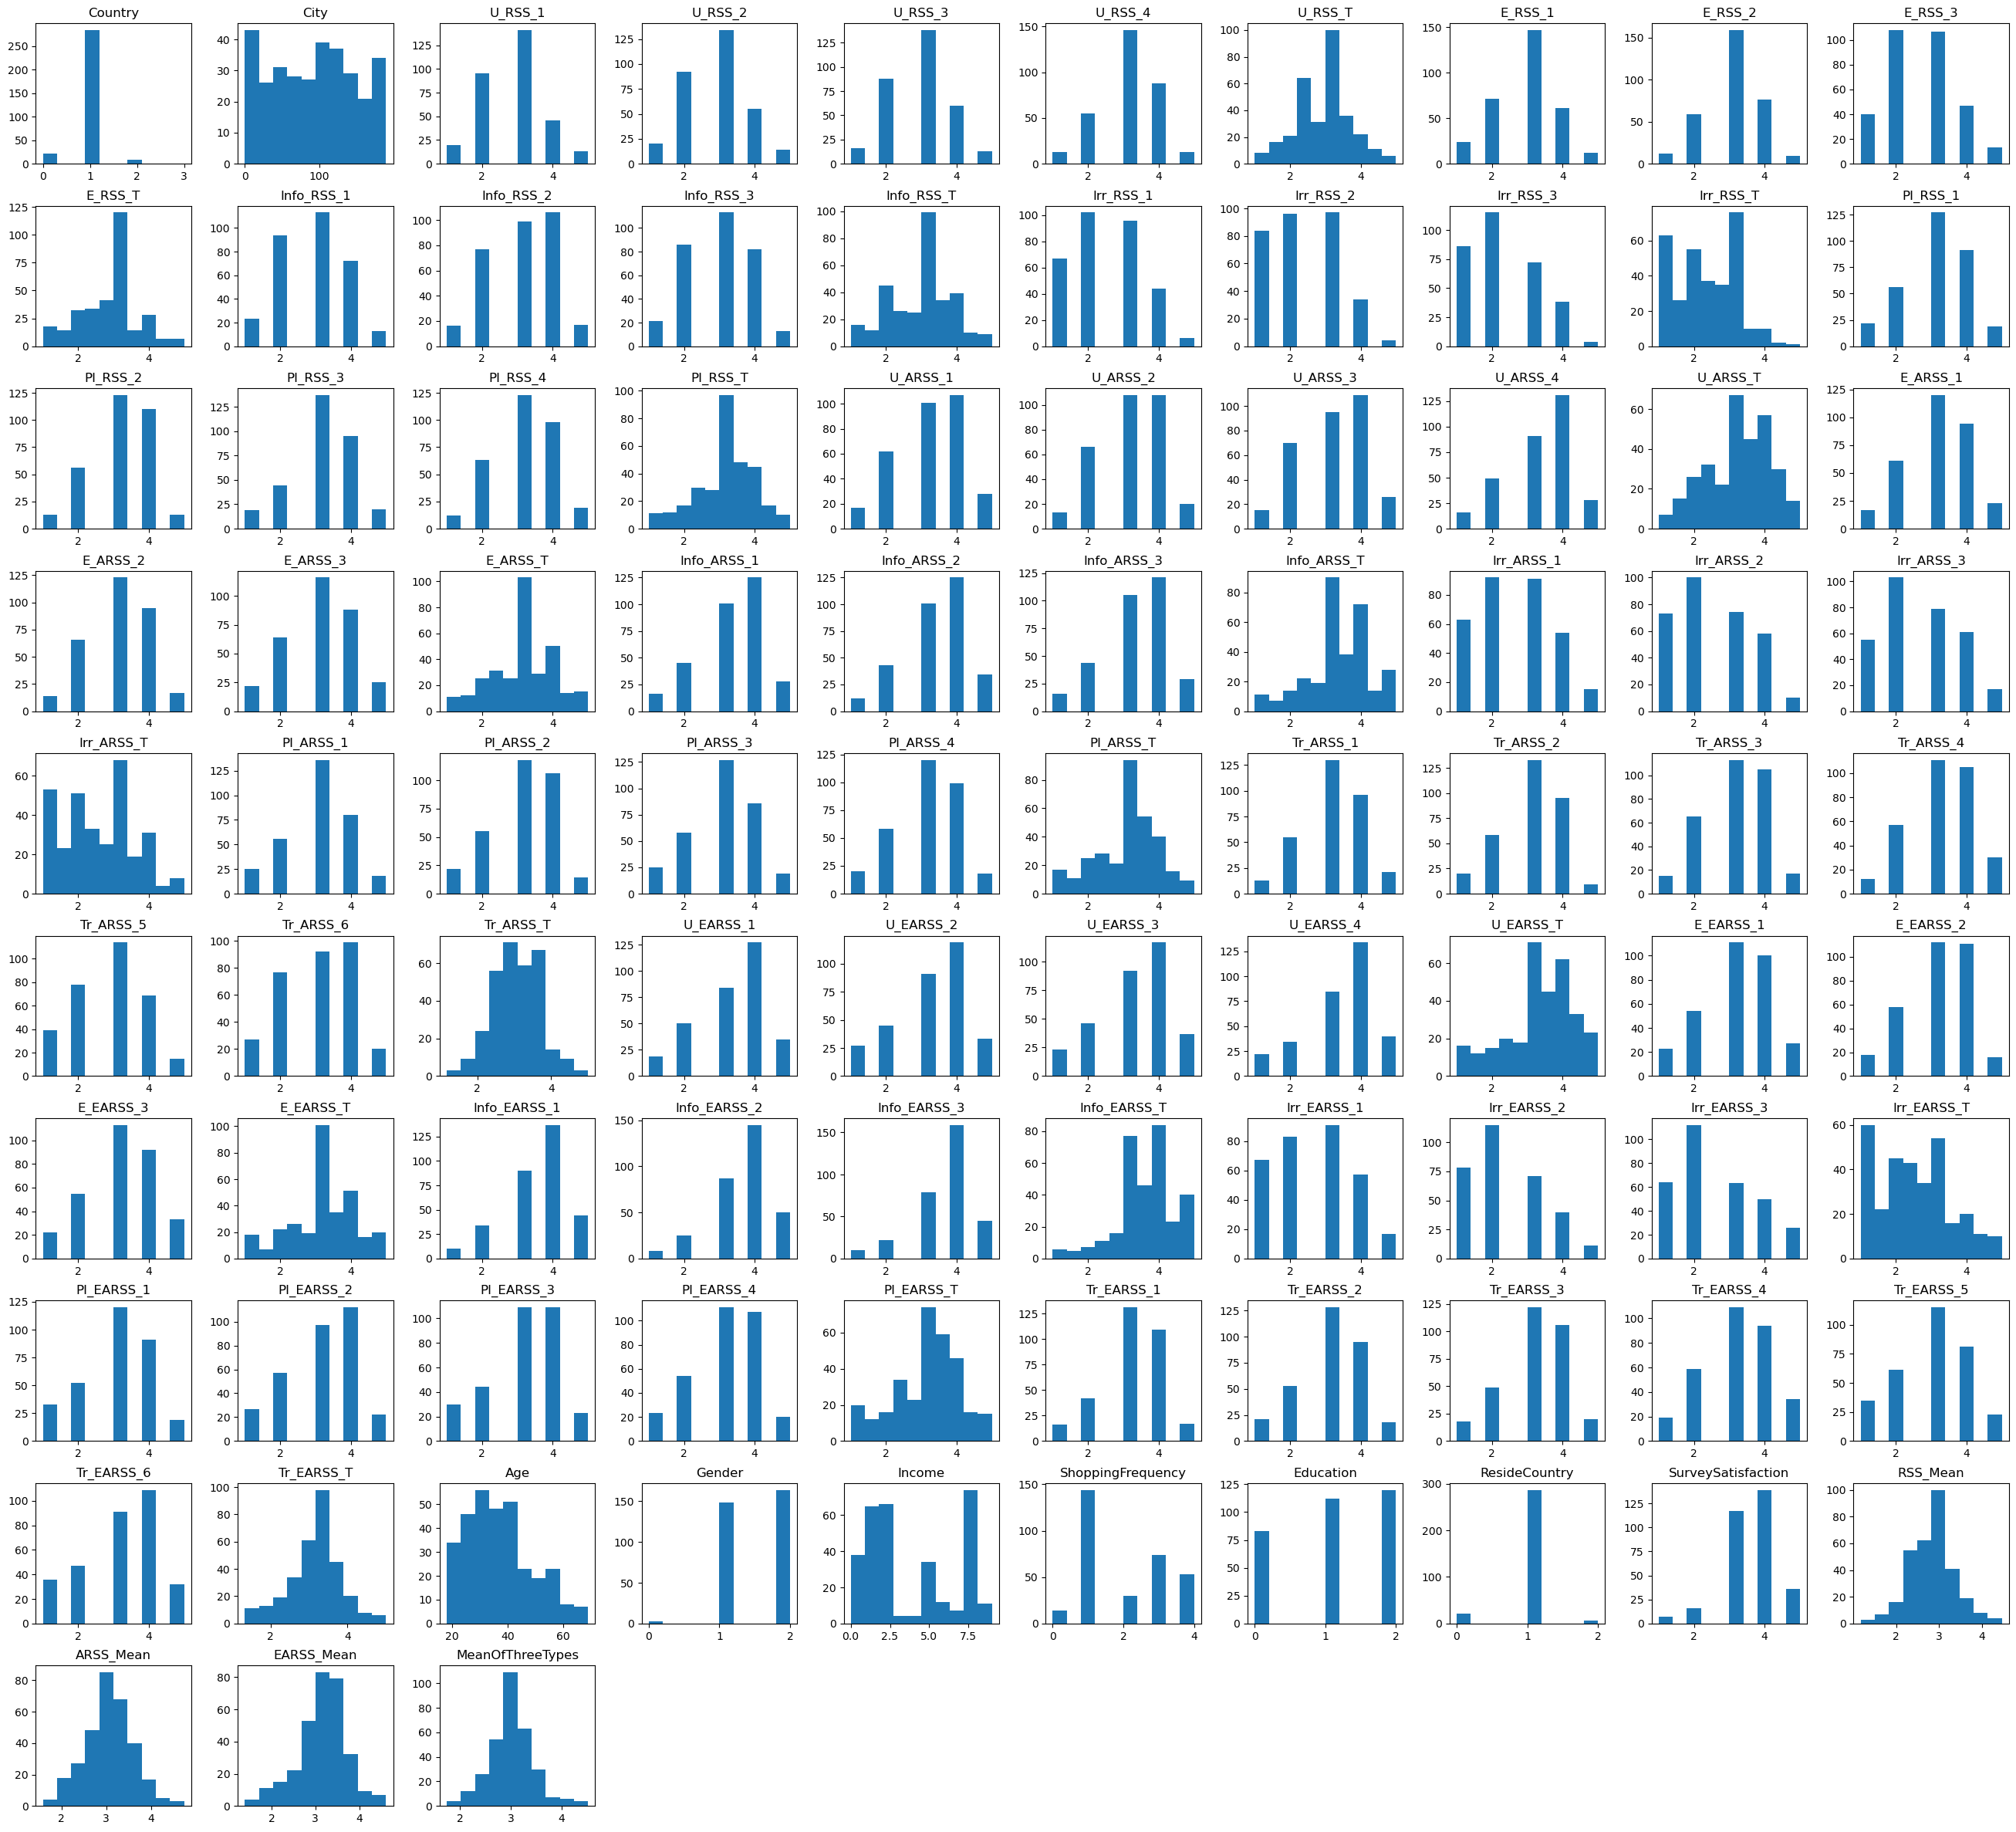

In [17]:
shopping.hist(bins=10,figsize=(33,30),grid=False)

In [18]:
#Mode of Gender, Education, Income, City, Shopping Frequency
print(f"Gender Mode: {shopping['Gender'].mode()}")
print(f"Education Mode: {shopping['Education'].mode()}")
print(f"Income Mode: {shopping['Income'].mode()}")
print(f"City Mode: {shopping['City'].mode()}")
print(f"ShoppingFrequency: {shopping['ShoppingFrequency'].mode()}")

f_count = 0
m_count = 0

for i in range(0,len(shopping['Gender'])):
    if(shopping['Gender'][i] == 1):
        f_count += 1
    else:
        m_count += 1
print(f"Female count: {f_count}")
print(f"Male count: {m_count}")

Gender Mode: 0    2
Name: Gender, dtype: int8
Education Mode: 0    2
Name: Education, dtype: int8
Income Mode: 0    8
Name: Income, dtype: int8
City Mode: 0    17
Name: City, dtype: int16
ShoppingFrequency: 0    1
Name: ShoppingFrequency, dtype: int8
Female count: 148
Male count: 167


In [19]:
#Mean of Age
print(shopping['Age'].mean())

37.08571428571429


<AxesSubplot:>

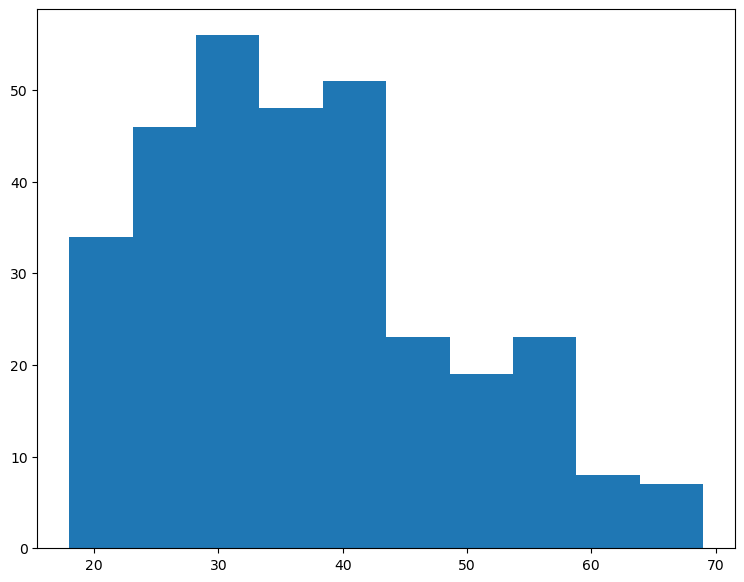

In [20]:
#Histogram of 'Age' Column which is right-skewed
shopping['Age'].hist(bins=10,figsize=(9,7),grid=False)

In [21]:
#As the 'Age' column is right-skewed, Square Root Transform was used to remove skewness
shopping['Age'] = np.sqrt(shopping['Age'])

<AxesSubplot:>

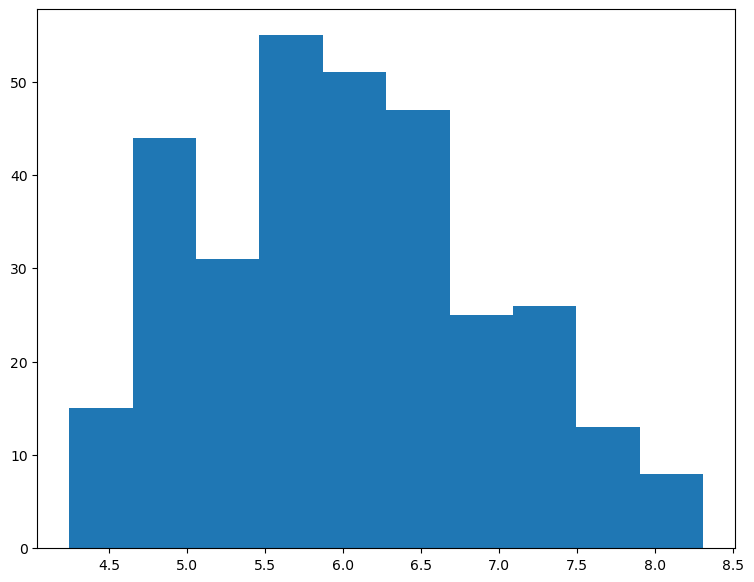

In [22]:
#Histogram of 'Age' Column after Square Root Transform
shopping['Age'].hist(bins=10,figsize=(9,7),grid=False)

In [26]:
#Mean of SurveySatisfaction
print(shopping['SurveySatisfaction'].mean())

3.574603174603175


In [27]:
#Mean Calculator for rows of questions
#(qCat=U|E|Info|Irr|PI|Tr, ShoppingType=RSS|ARSS|EARSS, qNum=number of question in the category)
def MeanCalForRows_Questions(qCat, shoppingType,qNum):
    if(qNum == 3):
        for i in range(0,315):
            print("%.2f" %((shopping[f"{qCat}_{shoppingType}_1"].iloc[i]+shopping[f"{qCat}_{shoppingType}_2"].iloc[i]+shopping[f"{qCat}_{shoppingType}_3"].iloc[i])/3)) 
    elif(qNum == 4):
        for i in range(0,315):
            print((shopping[f"{qCat}_{shoppingType}_1"].iloc[i]+shopping[f"{qCat}_{shoppingType}_2"].iloc[i]+shopping[f"{qCat}_{shoppingType}_3"].iloc[i]+shopping[f"{qCat}_{shoppingType}_4"].iloc[i])/4)
    elif(qNum == 6 and qCat != "RSS"):
        for i in range(0,315):
            print((shopping[f"{qCat}_{shoppingType}_1"].iloc[i]+shopping[f"{qCat}_{shoppingType}_2"].iloc[i]+shopping[f"{qCat}_{shoppingType}_3"].iloc[i]+shopping[f"{qCat}_{shoppingType}_4"].iloc[i]+shopping[f"{qCat}_{shoppingType}_5"].iloc[i]+shopping[f"{qCat}_{shoppingType}_6"].iloc[i])/6)

In [28]:
#HYPOTHESIS TESTING(1)
#H0: Yaşın alışveriş sıklığı üzerinde bir etkisi yoktur.
#H1: Yaşın alışveriş sıklığı üzerinde bir etkisi vardır.

#*Dependent variable: ShoppingFrequency (Categorical)
#*Independent variable: Age (Countinuous)

#Individual T-Test
ttest_ind(shopping['Age'],shopping['ShoppingFrequency'])

Ttest_indResult(statistic=45.720063563392955, pvalue=5.6022031375473845e-202)

In [29]:
#Reject null hypothesis of HYPOTHESIS 1 as p value is less than 0.05 which means statistically significant:
2.032391795554102e-67<0.05

True

In [30]:
#HYPOTHESIS TESTING(2)
#H0: Gelirin puanlama üzerinde bir etkisi yoktur.
#H1: Gelirin puanlama üzerinde bir etkisi vardır.

#*Dependent variable: MeanOfThreeTypes (Countinuous)
#*Independent variable: Income (Categorical)

#Individual T-Test
ttest_ind(shopping['Income'],shopping['MeanOfThreeTypes'])

Ttest_indResult(statistic=4.578928008391812, pvalue=5.636556352795527e-06)

In [31]:
#Reject null hypothesis of HYPOTHESIS 2 as p value is less than 0.05 which means statistically significant:
5.636556352795527e-06<0.05

True

In [32]:
#HYPOTHESIS TESTING(3)
#H0: EARSS'yi tercih etme cinsiyete dayanmamaktadır.
#H1: EARSS'yi tercih etme cinsiyete dayanmaktadır.

#*Dependent variable: EARSS_Mean (Countinous)
#*Independent variable: Gender (Categorical)

#Individual T-Test
ttest_ind(shopping['EARSS_Mean'],shopping['Gender'])

Ttest_indResult(statistic=38.31810756841222, pvalue=1.6004251396867655e-166)

In [33]:
#Reject null hypothesis of HYPOTHESIS 3 as p value is less than 0.05 which means statistically significant:
1.6004251396867655e-166<0.05

True

In [34]:
#HYPOTHESIS TESTING(4)
#H0: Yaşın SurveySatisfaction üzerinde etkisi yoktur.
#H1: Yaşın SurveySatisfaction üzerinde etkisi vardır.

#*Dependent variable: SurveySatisfaction (Countinous)
#*Independent variable: Age (Countinous)

#Pearson Correlation Coefficient
shopping['Age'].corr(shopping['SurveySatisfaction'])

-0.060887959964371935

In [35]:
#Failed to reject the null hypothesis of HYPOTHESIS 4 as the value is close to 0
round(-0.06527828242875618)

0

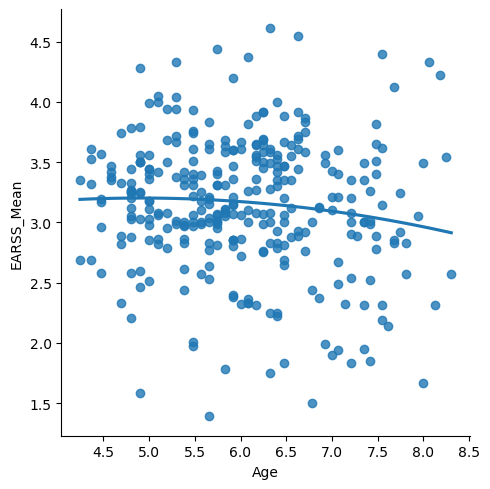

In [36]:
#MACHINE LEARNING
#"EARSS_Mean" vs "Age"
sns.lmplot(x ="Age", y ="EARSS_Mean", data = shopping, order = 2, ci = None)

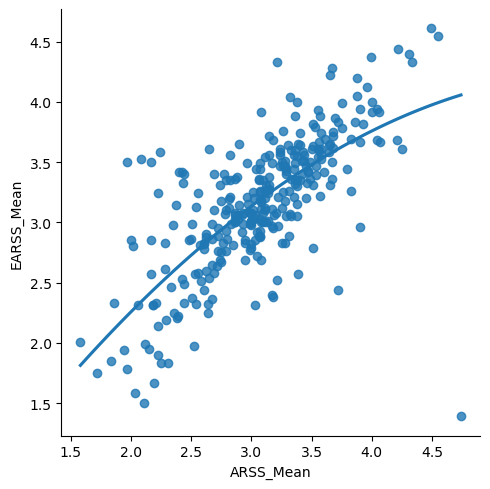

In [37]:
#MACHINE LEARNING
#"EARSS_Mean" vs "ARSS_Mean"
sns.lmplot(x ="ARSS_Mean", y ="EARSS_Mean", data = shopping, order = 2, ci = None)

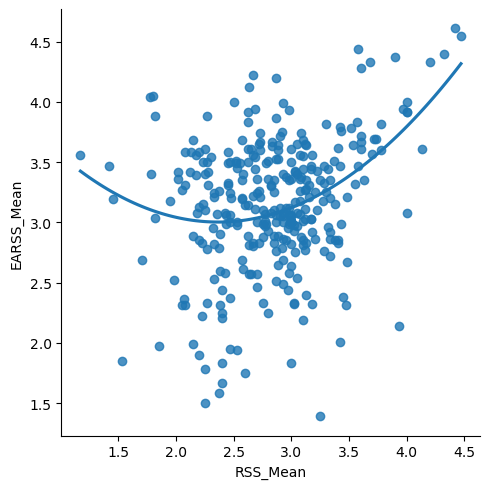

In [38]:
#MACHINE LEARNING
#"EARSS_Mean" vs "RSS_Mean"
sns.lmplot(x ="RSS_Mean", y ="EARSS_Mean", data = shopping, order = 2, ci = None)

In [39]:
#MACHINE LEARNING
#Assigning features that will be used in the prediciton and the feature that will be predicted
X = shopping[['ARSS_Mean','Age','RSS_Mean']]
y = shopping['EARSS_Mean'].values.reshape(-1, 1)

In [40]:
#MACHINE LEARNING
#Split the dataset as 70% is the training set and 30% is the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [41]:
#MACHINE LEARNING
#Training the data
regr = LinearRegression()

regr.fit(X_train, y_train)

LinearRegression()

In [42]:
#MACHINE LEARNING
#Making predictions
y_pred = regr.predict(X_test)

In [43]:
#MACHINE LEARNING
#Rectifier function to rectify regression outputs
def Rectifier(output):
    output_list = []
    
    for i in range(0,len(output)):
        output_list.append(output[i][0])
        
    return output_list

In [44]:
#MACHINE LEARNING
#Rectifying the output of y_test and y_pred for creating a comparison dataframe
y_test_list = Rectifier(y_test)
y_pred_list = Rectifier(y_pred)

In [45]:
#MACHINE LEARNING
#Creating a dataframe to compare actual and predicted values
pred_df=pd.DataFrame({'Actual Value':y_test_list,'Predicted Value':y_pred_list})
pred_df

,Actual Value,Predicted Value
0,3.99,3.676006
1,3.00,3.175799
2,3.07,2.932591
3,3.56,3.321129
4,2.81,2.813692
...,...,...
90,2.85,2.965412
91,3.40,2.819566
92,3.42,3.400162
93,3.05,3.367231


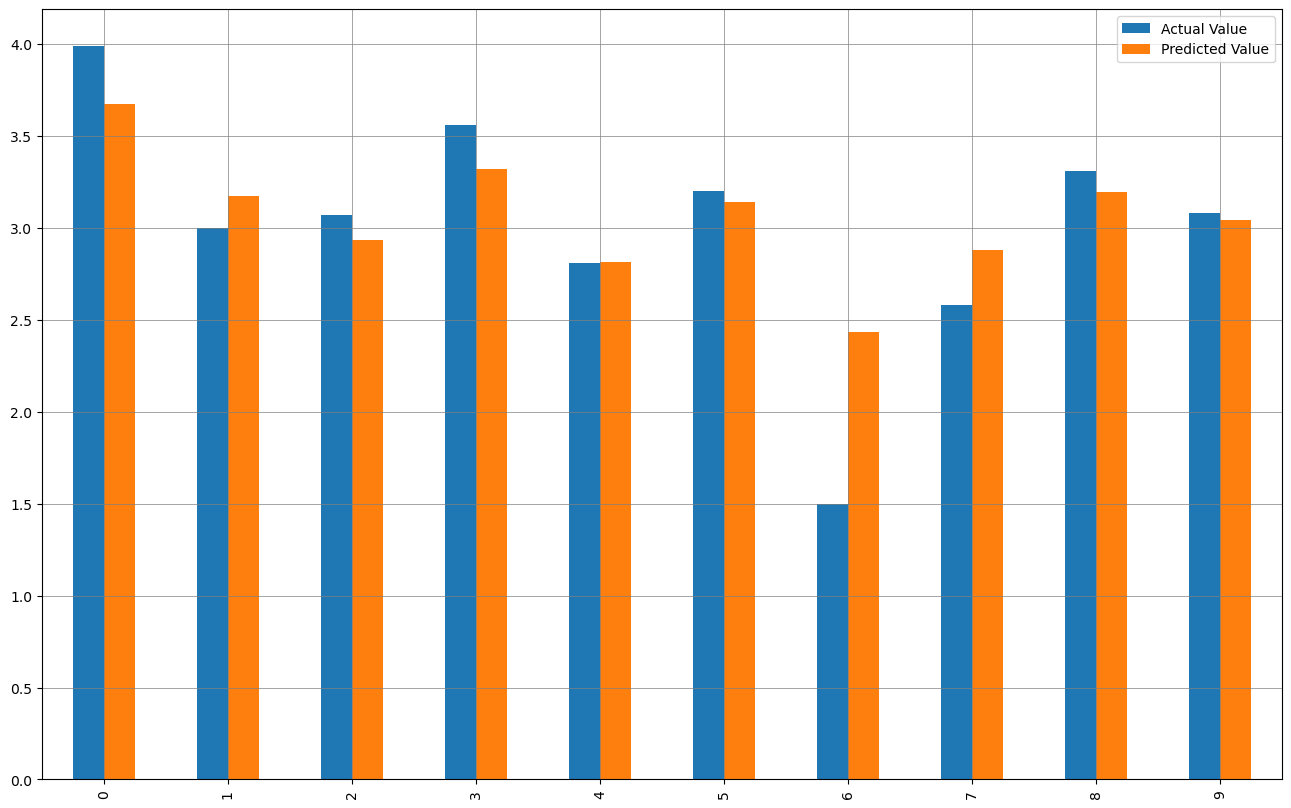

In [46]:
#MACHINE LEARNING
#Visualize first ten values from pred_df with bar plot
pred_visualize = pred_df.head(10)
pred_visualize.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

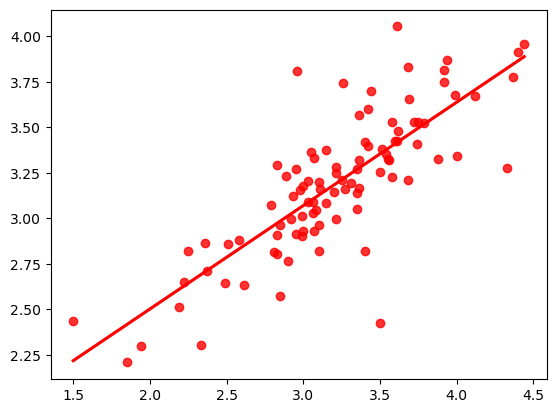

In [47]:
#MACHINE LEARNING
#Visualize first ten values from pred_df with regression plot
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [48]:
#MACHINE LEARNING
#Evaluation metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

MAE: 0.24810347097676946
MSE: 0.11053432294069312
MAE: 0.4980998604464465


In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import absolute
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(regr, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))

0.2776578086109962

In [52]:
scores = cross_val_score(regr, X, y, scoring='neg_root_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))

0.38311036597654413